# Import Liberaries

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Upload Data

In [2]:
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Preprocessing

In [3]:
print(bc.target[500])
print(bc.data[500])
print(bc.data.shape)

1
[1.504e+01 1.674e+01 9.873e+01 6.894e+02 9.883e-02 1.364e-01 7.721e-02
 6.142e-02 1.668e-01 6.869e-02 3.720e-01 8.423e-01 2.304e+00 3.484e+01
 4.123e-03 1.819e-02 1.996e-02 1.004e-02 1.055e-02 3.237e-03 1.676e+01
 2.043e+01 1.097e+02 8.569e+02 1.135e-01 2.176e-01 1.856e-01 1.018e-01
 2.177e-01 8.549e-02]
(569, 30)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

print(f'feature-> train:{X_train.shape} , test:{X_test.shape}')
print(f'label-> train:{y_train.shape} , test:{y_test.shape}')

feature-> train:(455, 30) , test:(114, 30)
label-> train:(455,) , test:(114,)


In [5]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc train:{acc_train} , acc test:{acc_test}')
    print(f'precision:{p}')
    print(f'recall:{r}')

    return acc_train, acc_test, p, r

# Defintion Models

### 1.Gaussian Nave Bays

In [7]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9340659340659341 , acc test:0.9298245614035088
precision:0.9466666666666667
recall:0.9466666666666667


### 2.KNN

In [8]:
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9736263736263736 , acc test:0.9824561403508771
precision:0.9866666666666667
recall:0.9866666666666667


### 3. Decision Tree

In [9]:
dt = DecisionTreeClassifier(max_depth=80, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9934065934065934 , acc test:0.956140350877193
precision:0.9861111111111112
recall:0.9466666666666667


### 4.Random Forest

In [10]:
rf = RandomForestClassifier(n_estimators=100, max_depth=80, min_samples_split=6)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9978021978021978 , acc test:0.9473684210526315
precision:0.9726027397260274
recall:0.9466666666666667


### 5.SVC

In [11]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9824175824175824 , acc test:0.9649122807017544
precision:0.9863013698630136
recall:0.96


### 6.Logistic Regression

In [ ]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

### 7.ANN

In [13]:
ann = MLPClassifier(hidden_layer_sizes=248, activation='relu', solver='adam', batch_size=64)

ann.fit(X_train, y_train)

y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc train:0.9846153846153847 , acc test:0.9736842105263158
precision:0.9864864864864865
recall:0.9733333333333334


C:\Users\lenovo\miniconda3\envs\numpy_course\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Conclusion

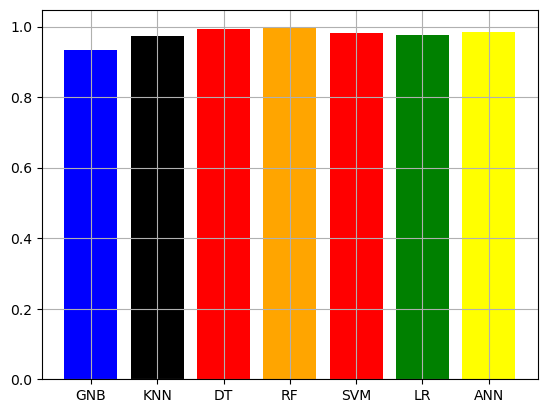

In [15]:
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors = ['blue', 'black', 'red', 'orange', 'red', 'green', 'yellow']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()
